In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.covariance import MinCovDet
from pyod.models.mcd import MCD
from sklearn.covariance import EllipticEnvelope
from scipy.spatial.distance import mahalanobis

In [3]:
from rpy2.robjects import numpy2ri, pandas2ri
from rpy2.robjects.packages import importr

In [4]:
import warnings 
warnings.filterwarnings("ignore")

### Data 1

In [5]:
np.random.seed(42)
mean = np.array([50, 50])
covariance_matrix = np.array([[25, 5], [5, 25]])
data1 = np.random.multivariate_normal(mean, covariance_matrix, size=50000)
inv_covariance_matrix = np.linalg.inv(covariance_matrix)

[]

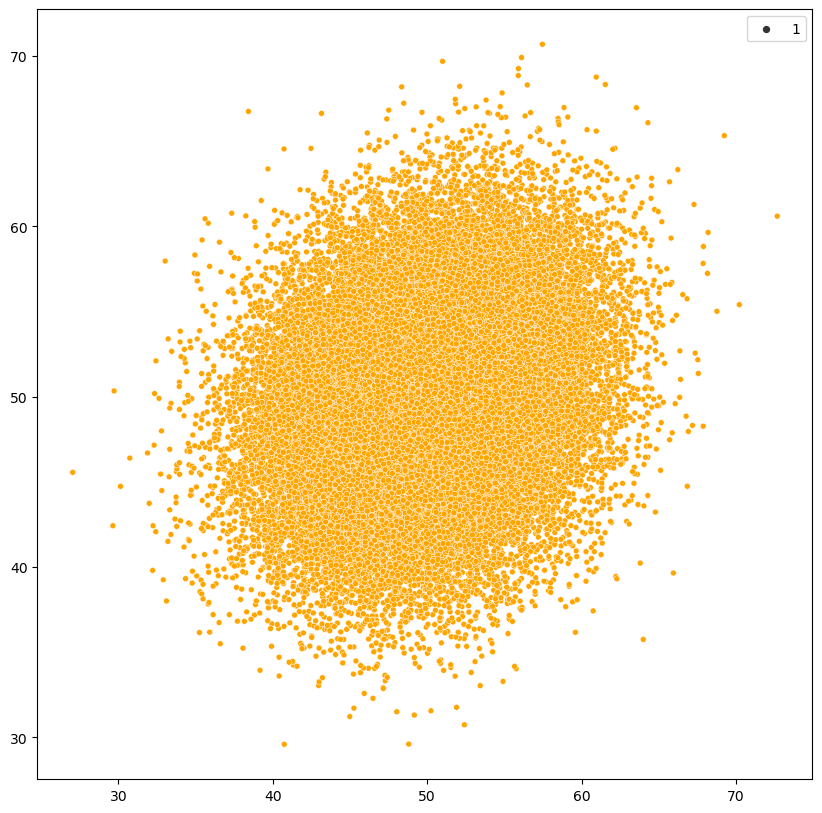

In [6]:
data = data1
plt.figure(figsize=(10,10))
sns.scatterplot(x=data[:,0],y=data[:,1],color='orange',size=1)
plt.plot()

In [7]:
data.shape

(50000, 2)

#### Mahalanobis Disance 

In [8]:
mahalanobis_distance = np.array([mahalanobis(x,mean,inv_covariance_matrix) for x in data])
threshold = np.percentile(mahalanobis_distance,99)
label = np.where(mahalanobis_distance < threshold,1,-1)

In [9]:
count = 0
for i in label:
    if i == -1:
        count +=1
count

500

[]

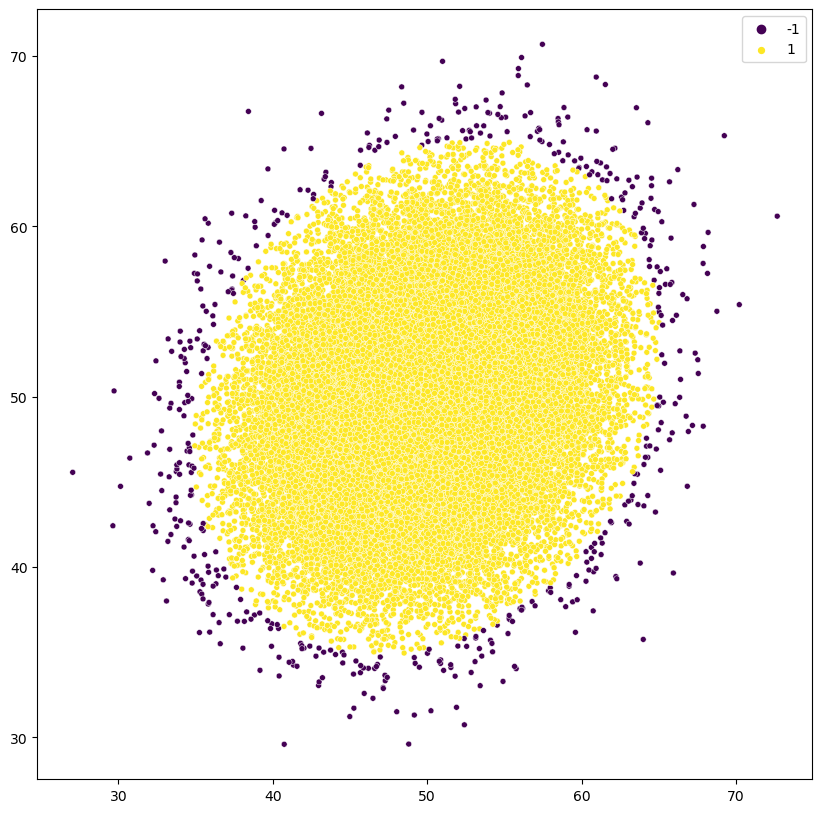

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data[:,0],y=data[:,1],hue=label,palette='viridis',size=1)
plt.plot()

#### Elliptic Envelope

In [11]:
model = EllipticEnvelope(contamination=0.01)
model.fit(data)
label = model.predict(data)

In [12]:
count = 0
for i in label:
    if i == -1:
        count += 1
count 

500

[]

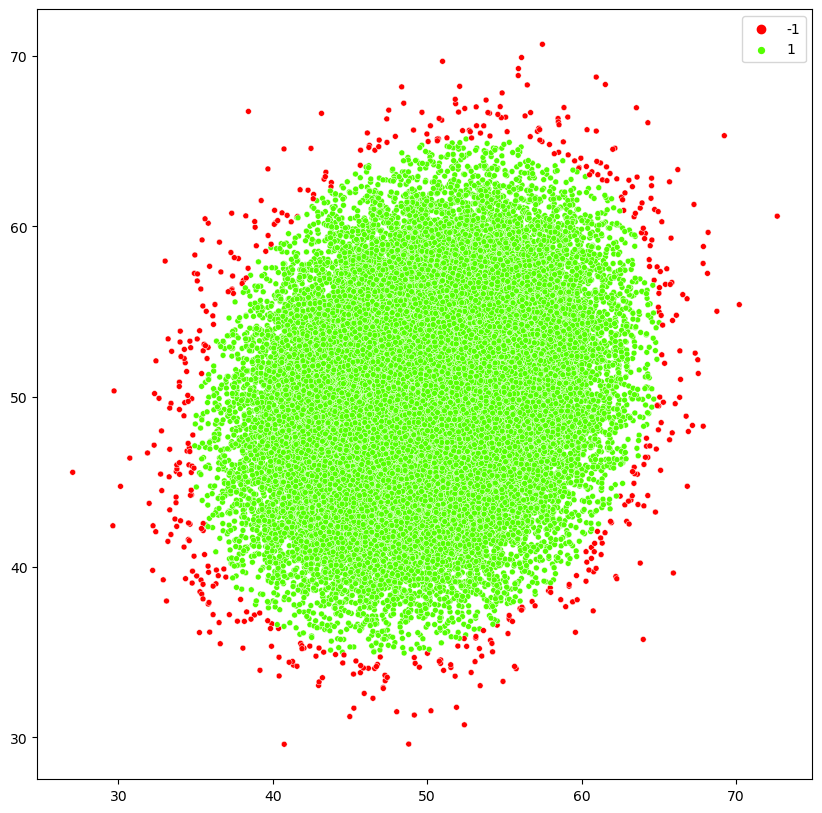

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data[:,0],y=data[:,1],hue=label,palette='prism',size=1)
plt.plot()

#### MCD ( Minimum Covariance Determinant )

In [14]:
# sklearn Implementation

In [15]:
mcd = MinCovDet()
mcd.fit(data)

MinCovDet()

In [16]:
mahalanobis_dist = mcd.mahalanobis(data)
threshold = np.percentile(mahalanobis_dist,97.5)
label = np.where(mahalanobis_dist < threshold,1,-1)

In [17]:
count = 0
for i in label:
    if i == -1:
        count += 1
count

1250

[]

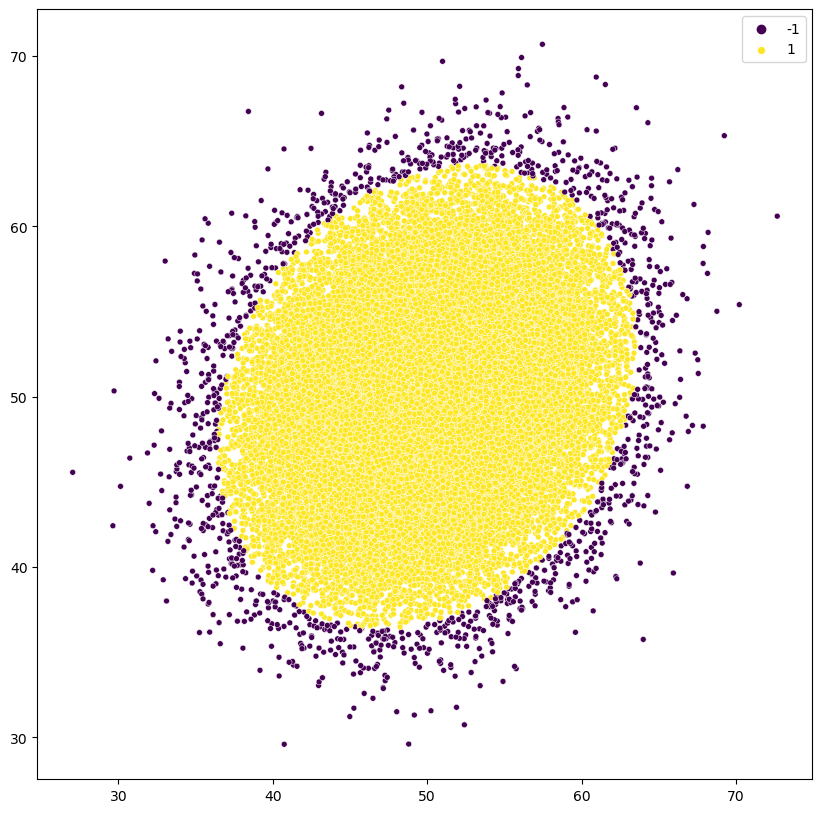

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data[:,0],y=data[:,1],hue=label,palette='viridis',size=1)
plt.plot()

In [19]:
# Pyod Implementation

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
mcd = MCD(contamination=0.01)
mcd.fit(data)
label = mcd.predict(data)

In [22]:
count = 0
for i in label:
    if i == 1:
        count += 1
count 

500

In [23]:
np.unique(label)

array([0, 1])

[]

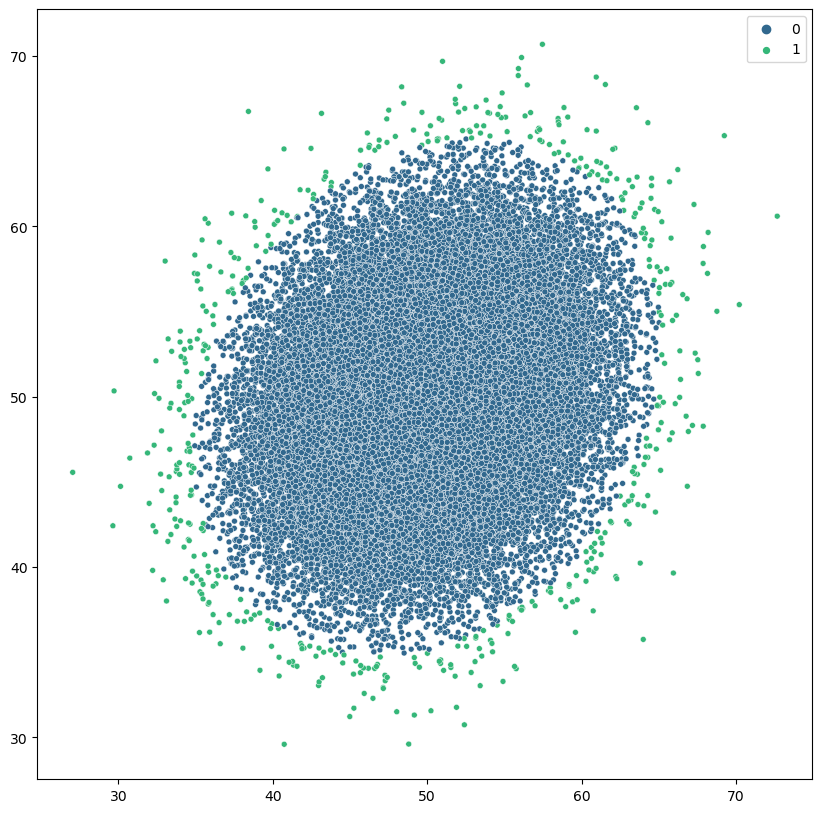

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data[:,0],y=data[:,1],hue=label,palette='viridis',size=1)
plt.plot()

### Data 2

In [25]:
np.random.seed(42)
mean = np.array([0, 0])
covariance_matrix = np.array([[1, 0.5],[0.5, 1]])
data2 = np.random.multivariate_normal(mean, covariance_matrix, size=50000)
inv_covariance_matrix = np.linalg.inv(covariance_matrix)

[]

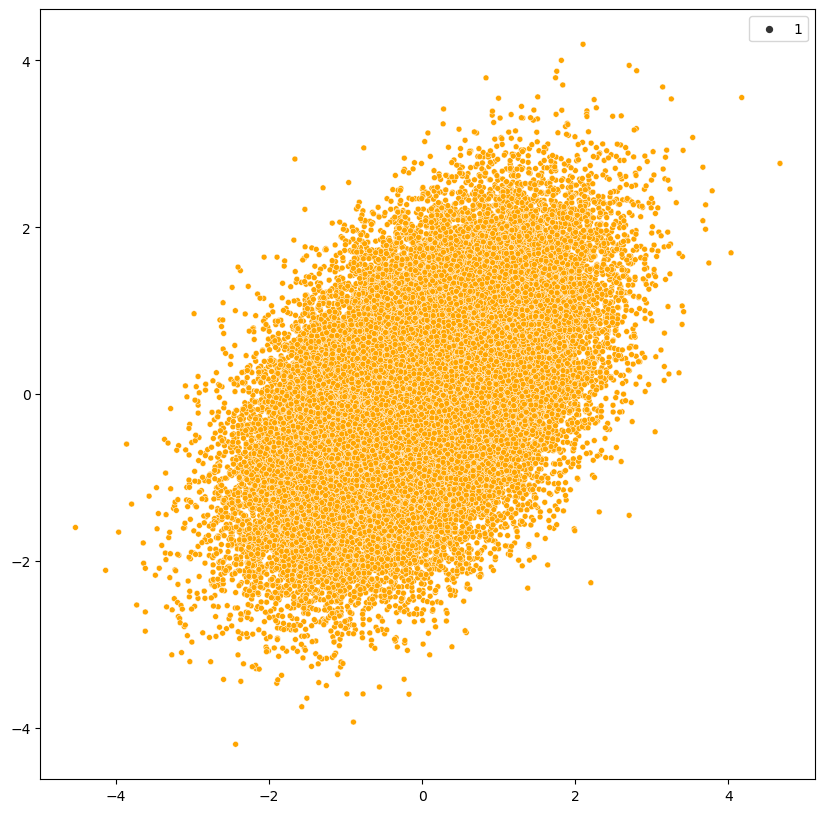

In [26]:
data = data2
plt.figure(figsize=(10,10))
sns.scatterplot(x=data[:,0],y=data[:,1],color='orange',size=1)
plt.plot()

In [27]:
data.shape

(50000, 2)

#### Mahalanobis Disance 

In [28]:
mahalanobis_distance = np.array([mahalanobis(x,mean,inv_covariance_matrix) for x in data])
threshold = np.percentile(mahalanobis_distance,99)
label = np.where(mahalanobis_distance < threshold,1,-1)

In [29]:
count = 0
for i in label:
    if i == -1:
        count +=1
count

500

[]

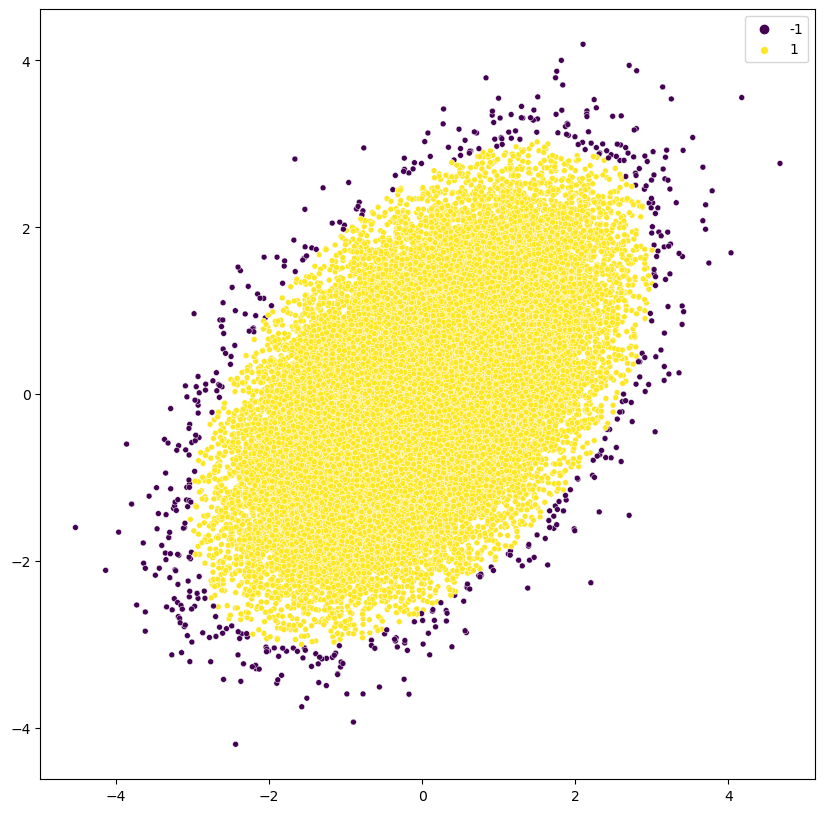

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data[:,0],y=data[:,1],hue=label,palette='viridis',size=1)
plt.plot()

#### Elliptic Envelope

In [31]:
model = EllipticEnvelope(contamination=0.01)
model.fit(data)
label = model.predict(data)

In [32]:
np.unique(label)

array([-1,  1])

In [33]:
count = 0
for i in label:
    if i == -1:
        count += 1
count 

500

[]

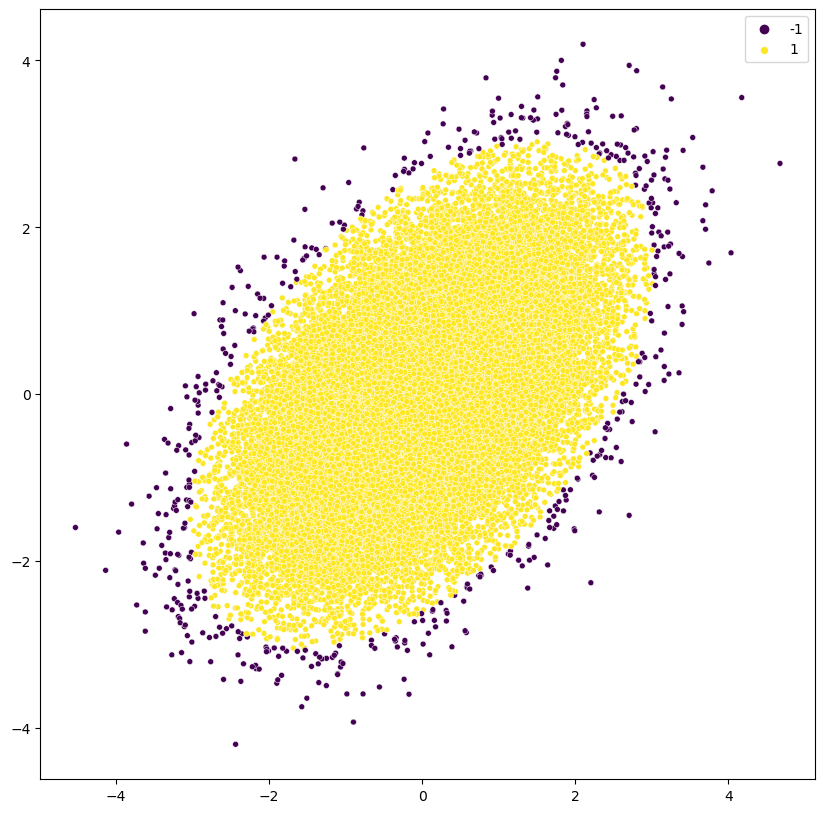

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data[:,0],y=data[:,1],hue=label,palette='viridis',size=1)
plt.plot()

#### MCD ( Minimum Covariance Determinant )

In [35]:
# sklearn Implementation

In [36]:
mcd = MinCovDet()
mcd.fit(data)

MinCovDet()

In [37]:
mahalanobis_dist = mcd.mahalanobis(data)
threshold = np.percentile(mahalanobis_dist,99)
label = np.where(mahalanobis_dist < threshold,1,-1)

In [38]:
count = 0
for i in label:
    if i == -1:
        count += 1
count

500

[]

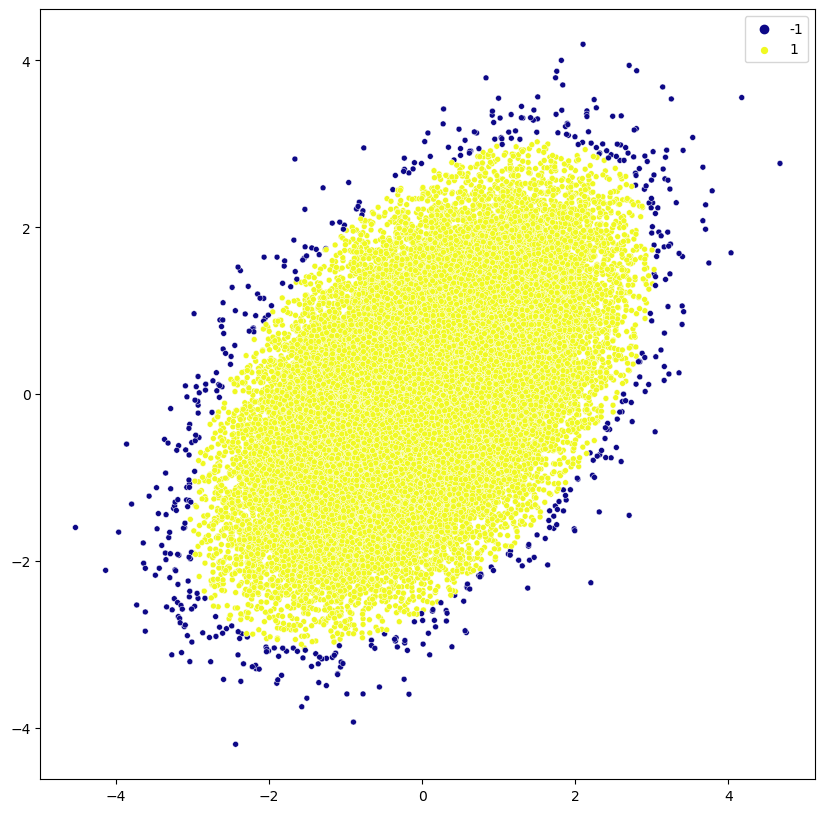

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data[:,0],y=data[:,1],hue=label,palette='plasma',size=1)
plt.plot()

In [40]:
# Pyod Implementation

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
mcd = MCD(contamination=0.025)
mcd.fit(data)
label = mcd.predict(data)

In [43]:
count = 0
for i in label:
    if i == 1:
        count += 1
count 

1250

[]

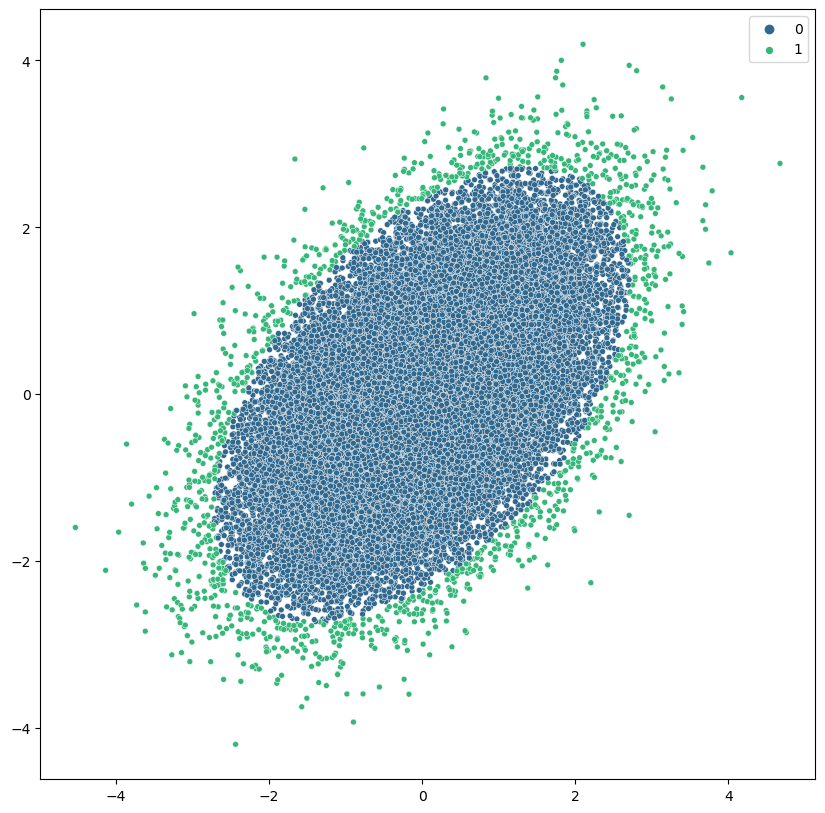

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data[:,0],y=data[:,1],hue=label,palette='viridis',size=1)
plt.plot()